# Spring 2024: CS5720 
## Neural Networks & Deep Learning - ICP-5

> #### Problem 1. 
    Implement Naïve Bayes method using scikit-learn library
        - Use dataset available with name glass
        - Use train_test_split to create training and testing part
        - Evaluate the model on test part using score and  

In [73]:
# import the necessary libraries
import pandas as pd
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sn

In [71]:
df = pd.read_csv('./Data/glass.csv')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [15]:
X = df.drop('Type',axis =1)
y = df['Type']

In [43]:
# load the train and test data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state= 23)

In [44]:
# print the sizes
for _ in (X_train, X_test, y_train, y_test):
    print(_.shape)

(171, 9)
(43, 9)
(171,)
(43,)


In [46]:
# check any null values
print(X_train[X_train.isnull().any(axis=1)])

Empty DataFrame
Columns: [RI, Na, Mg, Al, Si, K, Ca, Ba, Fe]
Index: []


In [52]:
## Naive bayes 
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [67]:
y_pred = gnb.predict(X_test)
acc_gnb = round(gnb.score(X_train, y_train) * 100, 2)
print("Naive bayes accuracy on train dataset is:",acc_gnb)

Naive bayes accuracy on train dataset is: 57.31


In [68]:
test_acc_gnb = round(gnb.score(X_test, y_test) * 100, 2)
print("Naive bayes accuracy on train dataset is:",test_acc_gnb)

Naive bayes accuracy on train dataset is: 37.21


In [69]:
# print classification report / confusion matrix 
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.37      0.54      0.44        13
           2       0.00      0.00      0.00        19
           3       0.12      0.33      0.18         3
           5       0.25      1.00      0.40         1
           6       0.40      1.00      0.57         2
           7       0.83      1.00      0.91         5

    accuracy                           0.37        43
   macro avg       0.33      0.65      0.42        43
weighted avg       0.24      0.37      0.29        43




> #### Problem 2. 
    Implement linear SVM method using scikit library
        - Use the same dataset above
        - Use train_test_split to create training and testing part
        - Evaluate the model on test part using score and generate report

In [62]:
# svm 
lin_svc = LinearSVC()
lin_svc.fit(X_train,y_train)

C:\Users\vamsi7\anaconda3\envs\ml_prac\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVC()

In [63]:
# accuracy score on train dataset
y_pred = lin_svc.predict(X_test)
acc_lin_svc = round(lin_svc.score(X_train, y_train) * 100, 2)
print("Naive bayes accuracy on train dataset is:",acc_lin_svc)

Naive bayes accuracy on train dataset is: 43.86


In [65]:
# accuracy score on test dataset
test_acc_lin_svc = round(lin_svc.score(X_test, y_test) * 100, 2)
print("Naive bayes accuracy on train dataset is:",test_acc_lin_svc)

Naive bayes accuracy on train dataset is: 41.86


In [66]:
# print classification report / confusion matrix 
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        13
           2       0.44      0.74      0.55        19
           3       0.00      0.00      0.00         3
           5       0.12      1.00      0.22         1
           6       0.00      0.00      0.00         2
           7       1.00      0.60      0.75         5

    accuracy                           0.42        43
   macro avg       0.26      0.39      0.25        43
weighted avg       0.31      0.42      0.33        43



C:\Users\vamsi7\anaconda3\envs\ml_prac\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vamsi7\anaconda3\envs\ml_prac\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vamsi7\anaconda3\envs\ml_prac\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##### The support vector machine working well on the data as the Naive bayes is not good for this kind of data

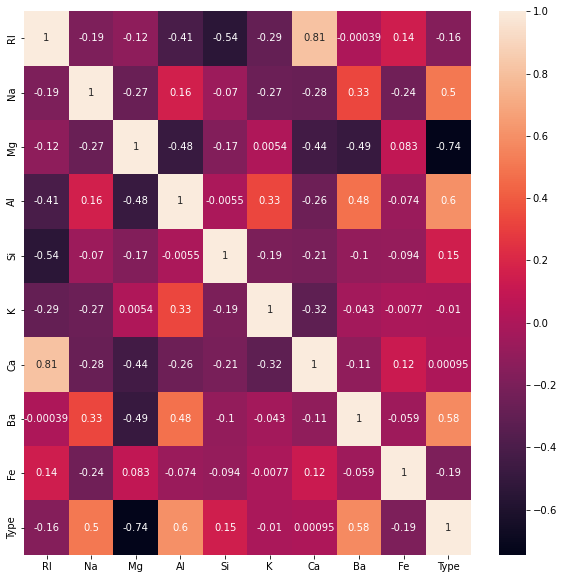

In [75]:
plt.figure(figsize=(10,10))
sn.heatmap(df.corr(),annot=True)
plt.show()

##### As we can see that the features are correlated each other which means the features were dependent on each other. Hence the naive bayes is performing poorly on the above dataset